# Analyzing Portfolio Risk and Return

In [67]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import hvplot.pandas
import plotly.express as px


%matplotlib inline



### Import the Data


### Tech Stocks
```
Growth stocks: FAANG
F – Facebook (FB)
A – Apple (AAPL)
A – Amazon (AMZN)
N – Netflix (NFLX)
G – Google (GOOG and GOOGL)
```

In [68]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_SECRET_KEY")

For simplicity, we choose 100 shares and same number of shares for comparison.

In [4]:
# Set current amount of shares
#Tech
my_amzn = 100
my_nflx = 100
my_spy = 100
my_goog = 100
my_fab = 100

# ETFs
my_voo = 100
my_vgt = 100


Alpaca API is used to get the data for the analysis

In [5]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

We extract the data for Facebook, Apple, Amazon, Netflix, Google and S&P 500.

In [6]:
# Formatting current date as ISO format
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-02-01", tz="America/New_York").isoformat()
# Setting the tickers
tickers = ["FB", "APPL","AMZN","NFLX","GOOG","SPY"]

# Setting timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Getting price data for the tickers
df_tech_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
FB = df_tech_stock_data[df_tech_stock_data['symbol']=='FB'].drop('symbol', axis=1)
APPL = df_tech_stock_data[df_tech_stock_data['symbol']=='APPL'].drop('symbol', axis=1)
SPY = df_tech_stock_data[df_tech_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AMZN = df_tech_stock_data[df_tech_stock_data['symbol']=='AMZN'].drop('symbol', axis=1)
NFLX = df_tech_stock_data[df_tech_stock_data['symbol']=='NFLX'].drop('symbol', axis=1)
GOOG = df_tech_stock_data[df_tech_stock_data['symbol']=='GOOG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_tech_stock_data = pd.concat([GOOG,APPL,SPY,AMZN,NFLX,FB],axis=1, keys=['GOOG','APPL','SPY','AMZN','NFLX','FB'])

# Preview DataFrame
df_tech_stock_data.head()
df_tech_stock_data.tail()

GOOG                                     \
                             open      high    low   close    volume   
timestamp                                                              
2023-01-26 05:00:00+00:00  98.280   99.2100  96.82   99.16  25649762   
2023-01-27 05:00:00+00:00  99.050  101.5800  98.97  100.71  29020354   
2023-01-30 05:00:00+00:00  98.745   99.4088  97.52   97.95  24376441   
2023-01-31 05:00:00+00:00  97.860   99.9100  97.79   99.87  22311426   
2023-02-01 05:00:00+00:00  99.740  102.1899  98.42  101.43  26445527   

                                                  APPL           ...     NFLX  \
                          trade_count        vwap open high low  ...   volume   
timestamp                                                        ...            
2023-01-26 05:00:00+00:00      211588   98.459748  NaN  NaN NaN  ...  8259655   
2023-01-27 05:00:00+00:00      227226  100.575468  NaN  NaN NaN  ...  6703548   
2023-01-30 05:00:00+00:00      199617   98.296387  NaN  NaN NaN  ...  5129284   
2023-01-31 05:00:00+00:00      178499   99.195614  NaN  NaN NaN  ...  5661804   
2023-02-01 05:00:00+00:00      261194  100.357705  NaN  NaN NaN  ...  8009922   

                                                    FB                        \
                          trade_count        vwap open high low close volume   
timestamp                                                                      
2023-01-26 05:00:00+00:00      143587  365.166163  NaN  NaN NaN   NaN    NaN   
2023-01-27 05:00:00+00:00      130305  362.717607  NaN  NaN NaN   NaN    NaN   
2023-01-30 05:00:00+00:00      115500  355.751427  NaN  NaN NaN   NaN    NaN   
2023-01-31 05:00:00+00:00      104309  352.829493  NaN  NaN NaN   NaN    NaN   
2023-02-01 05:00:00+00:00      149997  358.844881  NaN  NaN NaN   NaN    NaN   

                                            
                          trade_count vwap  
timestamp                                   
2023-01-26 05:00:00+00:00         NaN  NaN  
2023-01-27 05:00:00+00:00         NaN  NaN  
2023-01-30 05:00:00+00:00         NaN  NaN  
2023-01-31 05:00:00+00:00         NaN  NaN  
2023-02-01 05:00:00+00:00         NaN  NaN  

[5 rows x 42 columns]

### ETFs
```
Vanguard S&P 500 ETF (VOO)
Vanguard Information Technology ETF (VGT)
```

In [7]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-02-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["VOO", "VGT",'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for VOO and VGT
df_etf = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
VOO = df_etf[df_etf['symbol']=='VOO'].drop('symbol', axis=1)
VGT = df_etf[df_etf['symbol']=='VGT'].drop('symbol', axis=1)
SPY = df_etf[df_etf['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_etf = pd.concat([VOO,VGT,SPY],axis=1, keys=['VOO','VGT','SPY'])

# Preview DataFrame
df_etf.head()
df_etf.tail()

VOO                                   \
                             open    high     low   close   volume   
timestamp                                                            
2023-01-26 05:00:00+00:00  370.46  372.06  367.61  371.81  3461691   
2023-01-27 05:00:00+00:00  370.89  375.08  370.76  372.87  5549522   
2023-01-30 05:00:00+00:00  370.15  372.29  367.86  368.21  3281544   
2023-01-31 05:00:00+00:00  368.61  373.54  368.33  373.44  4182707   
2023-02-01 05:00:00+00:00  372.44  380.16  369.76  377.53  4945431   

                                                      VGT                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2023-01-26 05:00:00+00:00       60947  369.866936  348.56  350.61  344.565   
2023-01-27 05:00:00+00:00       80779  373.075238  348.19  354.52  348.000   
2023-01-30 05:00:00+00:00       86531  369.744484  347.89  349.57  344.920   
2023-01-31 05:00:00+00:00       71209  371.041445  345.43  350.46  344.970   
2023-02-01 05:00:00+00:00       96083  374.868964  350.19  361.70  349.010   

                           ...                                      SPY  \
                           ...  volume trade_count        vwap     open   
timestamp                  ...                                            
2023-01-26 05:00:00+00:00  ...  484840        9804  348.010604  403.130   
2023-01-27 05:00:00+00:00  ...  567344       10702  351.978615  403.655   
2023-01-30 05:00:00+00:00  ...  604139       12131  346.842538  402.800   
2023-01-31 05:00:00+00:00  ...  583306        8485  347.558452  401.130   
2023-02-01 05:00:00+00:00  ...  555752       12095  354.460348  405.211   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2023-01-26 05:00:00+00:00  404.92  400.03  404.75   72307597      521730   
2023-01-27 05:00:00+00:00  408.16  403.44  405.68   68346180      496480   
2023-01-30 05:00:00+00:00  405.13  400.28  400.59   74219199      515001   
2023-01-31 05:00:00+00:00  406.53  400.77  406.48   86836885      513130   
2023-02-01 05:00:00+00:00  413.67  402.35  410.80  101480517      833884   

                                       
                                 vwap  
timestamp                              
2023-01-26 05:00:00+00:00  402.612043  
2023-01-27 05:00:00+00:00  405.790293  
2023-01-30 05:00:00+00:00  402.226146  
2023-01-31 05:00:00+00:00  404.159126  
2023-02-01 05:00:00+00:00  407.864239  

[5 rows x 21 columns]

### Analyze the Performance

#### Clean And Organize The Data

#### Tech Stocks

We use for loop to loop through the data and extract close prices columns.

In [8]:
# extract close price from tech stock data 
tech_close_price = pd.DataFrame()
for i in [ticker[0] for ticker in df_tech_stock_data]:
    tech_close_price[i] = df_tech_stock_data[i]['close']
print(tech_close_price)
tech_close_price

                              GOOG  APPL     SPY     AMZN    NFLX      FB
timestamp                                                                
2020-01-02 05:00:00+00:00  1367.37   NaN  324.87  1898.01  329.81  209.78
2020-01-03 05:00:00+00:00  1360.66   NaN  322.43  1874.97  325.90  208.67
2020-01-06 05:00:00+00:00  1394.21   NaN  323.73  1902.88  335.83  212.60
2020-01-07 05:00:00+00:00  1393.34   NaN  322.74  1906.86  330.75  213.06
2020-01-08 05:00:00+00:00  1404.32   NaN  324.42  1891.97  339.26  215.22
...                            ...   ...     ...      ...     ...     ...
2023-01-26 05:00:00+00:00    99.16   NaN  404.75    99.22  364.87     NaN
2023-01-27 05:00:00+00:00   100.71   NaN  405.68   102.24  360.77     NaN
2023-01-30 05:00:00+00:00    97.95   NaN  400.59   100.55  353.11     NaN
2023-01-31 05:00:00+00:00    99.87   NaN  406.48   103.13  353.86     NaN
2023-02-01 05:00:00+00:00   101.43   NaN  410.80   105.15  361.99     NaN

[777 rows x 6 columns]


GOOG  APPL     SPY     AMZN    NFLX      FB
timestamp                                                                
2020-01-02 05:00:00+00:00  1367.37   NaN  324.87  1898.01  329.81  209.78
2020-01-03 05:00:00+00:00  1360.66   NaN  322.43  1874.97  325.90  208.67
2020-01-06 05:00:00+00:00  1394.21   NaN  323.73  1902.88  335.83  212.60
2020-01-07 05:00:00+00:00  1393.34   NaN  322.74  1906.86  330.75  213.06
2020-01-08 05:00:00+00:00  1404.32   NaN  324.42  1891.97  339.26  215.22
...                            ...   ...     ...      ...     ...     ...
2023-01-26 05:00:00+00:00    99.16   NaN  404.75    99.22  364.87     NaN
2023-01-27 05:00:00+00:00   100.71   NaN  405.68   102.24  360.77     NaN
2023-01-30 05:00:00+00:00    97.95   NaN  400.59   100.55  353.11     NaN
2023-01-31 05:00:00+00:00    99.87   NaN  406.48   103.13  353.86     NaN
2023-02-01 05:00:00+00:00   101.43   NaN  410.80   105.15  361.99     NaN

[777 rows x 6 columns]

We can't extract the close price because the APPL column seems to have all NaN and some NaN in FB columns. So it is necessary to check the number of NaN before starting to clean the data.  

In [9]:
# check the NAs for the APPL column 
tech_close_price.isna().sum()

GOOG      0
APPL    777
SPY       0
AMZN      0
NFLX      0
FB      163
dtype: int64

We could see that Apple column is all NaN so we need to drop the column to extract the close prices then clean the data further by running dropna().

In [10]:
# Drop the APPL column 
new_tech_close = tech_close_price.drop(columns = "APPL")
new_tech_close.dropna()

GOOG     SPY     AMZN    NFLX      FB
timestamp                                                          
2020-01-02 05:00:00+00:00  1367.37  324.87  1898.01  329.81  209.78
2020-01-03 05:00:00+00:00  1360.66  322.43  1874.97  325.90  208.67
2020-01-06 05:00:00+00:00  1394.21  323.73  1902.88  335.83  212.60
2020-01-07 05:00:00+00:00  1393.34  322.74  1906.86  330.75  213.06
2020-01-08 05:00:00+00:00  1404.32  324.42  1891.97  339.26  215.22
...                            ...     ...      ...     ...     ...
2022-06-02 04:00:00+00:00  2354.92  417.34  2510.22  205.09  198.86
2022-06-03 04:00:00+00:00  2290.92  410.54  2447.00  198.98  190.78
2022-06-06 04:00:00+00:00  2340.21  411.79   124.79  197.14  194.25
2022-06-07 04:00:00+00:00  2344.59  415.74   123.00  198.61  195.65
2022-06-08 04:00:00+00:00  2344.76  411.22   121.18  202.83  196.64

[614 rows x 5 columns]

We run describe() function providing summary on tech close prices. We see that Amazon and Google hold the highest mean for their close prices compared to their peers and S&P 500 index.

In [11]:
new_tech_close.describe()

GOOG         SPY         AMZN        NFLX          FB
count   777.00000  777.000000   777.000000  777.000000  614.000000
mean   1749.63686  385.645046  2375.765894  427.565490  269.139340
std     927.80040   54.192270  1262.537570  133.427303   58.349326
min      83.49000  222.680000    81.820000  166.370000  146.010000
25%    1383.94000  342.900000  1892.000000  329.810000  218.490000
50%    1777.02000  391.840000  3074.960000  470.610000  267.820000
75%    2564.91000  429.060000  3286.650000  523.890000  324.592500
max    3014.18000  477.710000  3731.410000  691.690000  382.180000

#### ETFs

In [12]:
# loop through the etf close price 
df_etf_close = pd.DataFrame()
for i in [ticker[0] for ticker in df_etf]:
    df_etf_close[i] = df_etf[i]['close']
df_etf_close

VOO     VGT     SPY
timestamp                                        
2020-01-02 05:00:00+00:00  298.42  249.34  324.87
2020-01-03 05:00:00+00:00  296.24  246.72  322.43
2020-01-06 05:00:00+00:00  297.35  247.54  323.73
2020-01-07 05:00:00+00:00  296.53  247.51  322.74
2020-01-08 05:00:00+00:00  298.06  250.12  324.42
...                           ...     ...     ...
2023-01-26 05:00:00+00:00  371.81  350.41  404.75
2023-01-27 05:00:00+00:00  372.87  352.02  405.68
2023-01-30 05:00:00+00:00  368.21  345.14  400.59
2023-01-31 05:00:00+00:00  373.44  350.38  406.48
2023-02-01 05:00:00+00:00  377.53  358.98  410.80

[777 rows x 3 columns]

In [13]:
# Clean the etf close_price data
new_etf_close = df_etf_close.dropna()
new_etf_close

VOO     VGT     SPY
timestamp                                        
2020-01-02 05:00:00+00:00  298.42  249.34  324.87
2020-01-03 05:00:00+00:00  296.24  246.72  322.43
2020-01-06 05:00:00+00:00  297.35  247.54  323.73
2020-01-07 05:00:00+00:00  296.53  247.51  322.74
2020-01-08 05:00:00+00:00  298.06  250.12  324.42
...                           ...     ...     ...
2023-01-26 05:00:00+00:00  371.81  350.41  404.75
2023-01-27 05:00:00+00:00  372.87  352.02  405.68
2023-01-30 05:00:00+00:00  368.21  345.14  400.59
2023-01-31 05:00:00+00:00  373.44  350.38  406.48
2023-02-01 05:00:00+00:00  377.53  358.98  410.80

[777 rows x 3 columns]

From the summary statistics, we could see that VGT is the most volatile. This would be validated later in risk analysis.

In [14]:
new_etf_close.describe()

VOO         VGT         SPY
count  777.000000  777.000000  777.000000
mean   354.553938  346.694458  385.645046
std     49.909617   60.744415   54.192270
min    204.270000  185.570000  222.680000
25%    315.080000  311.100000  342.900000
50%    360.160000  349.890000  391.840000
75%    394.350000  391.320000  429.060000
max    439.250000  466.100000  477.710000

##### Daily & Cumulative Returns

We calculate both daily and cumulative returns to analyze the performance. 

###### TECH


In [15]:
# Convert the dataframe of prices to daily returns
tech_daily_returns = new_tech_close.pct_change().dropna()
tech_daily_returns.head()

GOOG       SPY      AMZN      NFLX        FB
timestamp                                                                  
2020-01-03 05:00:00+00:00 -0.004907 -0.007511 -0.012139 -0.011855 -0.005291
2020-01-06 05:00:00+00:00  0.024657  0.004032  0.014886  0.030469  0.018834
2020-01-07 05:00:00+00:00 -0.000624 -0.003058  0.002092 -0.015127  0.002164
2020-01-08 05:00:00+00:00  0.007880  0.005205 -0.007809  0.025729  0.010138
2020-01-09 05:00:00+00:00  0.011044  0.006689  0.004799 -0.010611  0.014311

In [16]:
tech_daily_returns.describe()

GOOG         SPY        AMZN        NFLX          FB
count  776.000000  776.000000  776.000000  776.000000  776.000000
mean    -0.000451    0.000420   -0.000814    0.000676    0.000245
std      0.040443    0.015323    0.042038    0.032550    0.025290
min     -0.951267   -0.107828   -0.949003   -0.351166   -0.263901
25%     -0.009693   -0.006577   -0.012850   -0.014789   -0.008648
50%      0.001462    0.000906    0.000750    0.000329    0.000000
75%      0.011559    0.008187    0.012705    0.015384    0.011535
max      0.094017    0.086761    0.135359    0.168543    0.176138

 The average daily stock returns for the time slice is as follows:
 
    * Netflix = 0.000676 or 0.0676%(a little more than half a percent)
    * S&P = 0.000420 or 0.0420%(a little less than half a percent)
    * Facebook = 0.000245 or 0.0245%
    * GOOG = -0.000451 or -0.0451%
    * Amazon = -0.000814 or -0.0814%

In [17]:
tech_daily_returns.hvplot(kind='line', title='Tec Stocks Daily Returns')

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [18]:
# Cumulative returns of the tech portfolios and the S&P 500
tech_cumulative_returns = (1 + tech_daily_returns).cumprod()
tech_cumulative_returns.tail()


GOOG       SPY      AMZN      NFLX        FB
timestamp                                                                  
2023-01-26 05:00:00+00:00  0.072519  1.245883  0.052276  1.106304  0.937363
2023-01-27 05:00:00+00:00  0.073652  1.248746  0.053867  1.093872  0.937363
2023-01-30 05:00:00+00:00  0.071634  1.233078  0.052977  1.070647  0.937363
2023-01-31 05:00:00+00:00  0.073038  1.251208  0.054336  1.072921  0.937363
2023-02-01 05:00:00+00:00  0.074179  1.264506  0.055400  1.097571  0.937363

In [19]:
tech_cumulative_returns.describe()

GOOG         SPY        AMZN        NFLX          FB
count  776.000000  776.000000  776.000000  776.000000  776.000000
mean     1.279924    1.187316    1.252038    1.296781    1.210731
std      0.678892    0.166784    0.665558    0.404679    0.284581
min      0.061059    0.685443    0.043108    0.504442    0.696015
25%      1.013533    1.056423    0.996830    1.000152    0.937363
50%      1.301184    1.206175    1.620300    1.430657    1.150443
75%      1.876270    1.320774    1.731807    1.588566    1.460232
max      2.204363    1.470465    1.965959    2.097238    1.821813

In [20]:
# Plot cumulative returns 
tech_cumulative_returns.hvplot(kind = "line", title="Tech Funds portfolios and the S&P 500 Cumulative Returns")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

 Based on the cumulative return information, none of the stocks have outperformed the S&P on Febrary 1st 2023. S&P, Netflix, Facebook, Google and Amazon showed a cumulative returns of 127%, 109%, 93%, 7.4%, 5.5% respectively.  However, the stocks have experienced fluctuation throughout 2021 and 2022 with GOOG outperforming all its peers even the S&P 500 with 220% on November 2021. Netflix comes next with 209% in November 2021, then Amazon and facebook respectively.

###### ETFs

In [21]:
# ETF daily returns
etf_daily_returns = new_etf_close.pct_change().dropna()
etf_daily_returns.head()

VOO       VGT       SPY
timestamp                                              
2020-01-03 05:00:00+00:00 -0.007305 -0.010508 -0.007511
2020-01-06 05:00:00+00:00  0.003747  0.003324  0.004032
2020-01-07 05:00:00+00:00 -0.002758 -0.000121 -0.003058
2020-01-08 05:00:00+00:00  0.005160  0.010545  0.005205
2020-01-09 05:00:00+00:00  0.006911  0.011235  0.006689

In [22]:
etf_daily_returns.describe()

VOO         VGT         SPY
count  776.000000  776.000000  776.000000
mean     0.000425    0.000669    0.000420
std      0.015576    0.019949    0.015323
min     -0.100319   -0.120321   -0.107828
25%     -0.006597   -0.009597   -0.006577
50%      0.000925    0.001201    0.000906
75%      0.008327    0.011496    0.008187
max      0.094385    0.110140    0.086761

The average daily etf returns for the time slice is as follows:

    * VOO = 0.00425 or 0.425% (a little less than half a percent)
    * VGT = 0.000669 or 0.069%
    * SPY = 0.000420 or 0.042%


In [23]:
etf_daily_returns.hvplot(kind='line', title='ETF Daily Returns')

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

Based on the distribution of daily returns throughout 2020-2023, it would appear that VGT performance is strongest over the near-term as well as long term period. If this outperformance will continue, it might be time to consider investing in the stock. We will explore this more in the monte carlo simulation.

In [24]:
# ETF cumulative returns
etf_cumulative_returns = (1 + etf_daily_returns).cumprod()
etf_cumulative_returns.tail()

VOO       VGT       SPY
timestamp                                              
2023-01-26 05:00:00+00:00  1.245929  1.405350  1.245883
2023-01-27 05:00:00+00:00  1.249481  1.411807  1.248746
2023-01-30 05:00:00+00:00  1.233865  1.384214  1.233078
2023-01-31 05:00:00+00:00  1.251391  1.405230  1.251208
2023-02-01 05:00:00+00:00  1.265096  1.439721  1.264506

In [25]:
# Plot ETF cumulative returns
etf_cumulative_returns.hvplot(kind = "line", title="ETFs Funds portfolios and the S&P 500 Cumulative Returns")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

Based on the cumulative return information, VGT seems to have perfomed best throughout the periof with 144% cumulative returns on 2023 comapred to 125% cumulative returns for both S&P and VOO. 

From the analysis and visualization, we could see that VGT does outperform the S&P 500 throughout the period. 

#### Best performing stock and ETFs based on cumulative returns

We calculate the return value of $10000 invetsment made at the start of the period on the tech stocks and ETFs to identify the best performing stock based on the cumulative returns:

The formula to calculate the return value is: inital investment * cumulative return.

In [26]:
initial_investment = 10000

# Tech
amzn_return = tech_cumulative_returns['AMZN']
FB_return = tech_cumulative_returns['FB']
SPY_return = tech_cumulative_returns['SPY']
NFLX_return = tech_cumulative_returns['NFLX']
GOOG_return = tech_cumulative_returns['GOOG']

amzn_ending_value = initial_investment * (amzn_return.loc['2023-02-01'])[0]
print(amzn_ending_value)
fb_ending_value = initial_investment * (FB_return.loc['2023-02-01'])[0]
print(fb_ending_value)
# SPY_ending_value = initial_investment * (SPY_return.loc['2023-02-01'])[0]
# print(SPY_ending_value)
nflx_ending_value = initial_investment * (NFLX_return.loc['2023-02-01'])[0]
print(nflx_ending_value)
goog_ending_value = initial_investment * (GOOG_return.loc['2023-02-01'])[0]
print(goog_ending_value)

print(f"A $10,000 investment in the best performing stock Netflix at the start of 2023 would have returned ${nflx_ending_value: .2f}.")

# ETF
voo_return = etf_cumulative_returns['VOO']
vgt_return = etf_cumulative_returns['VGT']
voo_ending_value = initial_investment * (voo_return.loc['2023-02-01'])[0]
print(voo_ending_value)
vgt_ending_value = initial_investment * (vgt_return.loc['2023-02-01'])[0]
print(vgt_ending_value)

print(f"A $10,000 investment in the best performing ETF at the start of 2023 would have returned ${vgt_ending_value: .2f}.")

554.0012960943293
9373.629516636458
10975.713289469739
741.7889817679182
A $10,000 investment in the best performing stock Netflix at the start of 2023 would have returned $ 10975.71.
12650.96173178743
14397.208630785239
A $10,000 investment in the best performing ETF at the start of 2023 would have returned $ 14397.21.


#### Plotly vs hvplot

We use Plotly as a visualization library and compare it to hvplot.

In [27]:
etf_daily_returns = etf_daily_returns.reset_index()
etf_daily_returns = etf_daily_returns.rename(columns={"timestamp": "Date"})
etf_daily_returns.set_index("Date")

VOO       VGT       SPY
Date                                                   
2020-01-03 05:00:00+00:00 -0.007305 -0.010508 -0.007511
2020-01-06 05:00:00+00:00  0.003747  0.003324  0.004032
2020-01-07 05:00:00+00:00 -0.002758 -0.000121 -0.003058
2020-01-08 05:00:00+00:00  0.005160  0.010545  0.005205
2020-01-09 05:00:00+00:00  0.006911  0.011235  0.006689
...                             ...       ...       ...
2023-01-26 05:00:00+00:00  0.010683  0.015917  0.010990
2023-01-27 05:00:00+00:00  0.002851  0.004595  0.002298
2023-01-30 05:00:00+00:00 -0.012498 -0.019544 -0.012547
2023-01-31 05:00:00+00:00  0.014204  0.015182  0.014703
2023-02-01 05:00:00+00:00  0.010952  0.024545  0.010628

[776 rows x 3 columns]

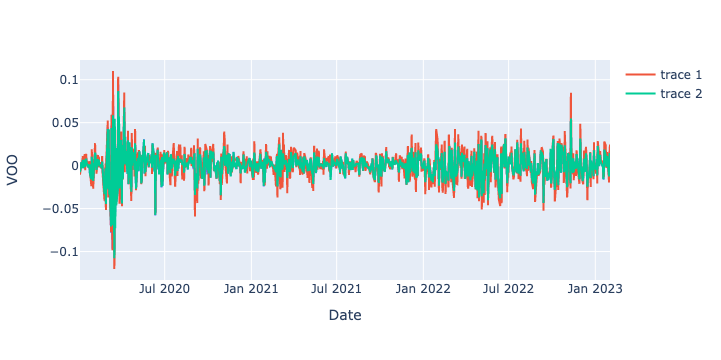

In [28]:
fig = px.line(etf_daily_returns, x="Date", y="VOO")
# generate scatter plot
fig.add_scatter(x=etf_daily_returns['Date'], y=etf_daily_returns['VGT'])
fig.add_scatter(x=etf_daily_returns['Date'], y=etf_daily_returns['SPY'])
fig.show()

In [29]:
etf_returns_hvplot = etf_daily_returns.hvplot(kind='line', title='ETFs Performance')

In [30]:
etf_cumulative_returns = etf_cumulative_returns.reset_index()
etf_cumulative_returns = etf_cumulative_returns.rename(columns={"timestamp": "Date"})
etf_cumulative_returns.set_index("Date")

VOO       VGT       SPY
Date                                                   
2020-01-03 05:00:00+00:00  0.992695  0.989492  0.992489
2020-01-06 05:00:00+00:00  0.996414  0.992781  0.996491
2020-01-07 05:00:00+00:00  0.993667  0.992661  0.993444
2020-01-08 05:00:00+00:00  0.998794  1.003128  0.998615
2020-01-09 05:00:00+00:00  1.005697  1.014398  1.005294
...                             ...       ...       ...
2023-01-26 05:00:00+00:00  1.245929  1.405350  1.245883
2023-01-27 05:00:00+00:00  1.249481  1.411807  1.248746
2023-01-30 05:00:00+00:00  1.233865  1.384214  1.233078
2023-01-31 05:00:00+00:00  1.251391  1.405230  1.251208
2023-02-01 05:00:00+00:00  1.265096  1.439721  1.264506

[776 rows x 3 columns]

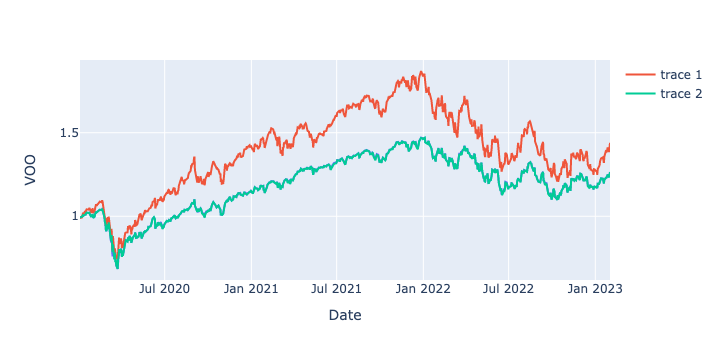

In [31]:
fig = px.line(etf_cumulative_returns, x="Date", y="VOO")
# generate scatter plot
fig.add_scatter(x=etf_cumulative_returns['Date'], y=etf_cumulative_returns['VGT'])
fig.add_scatter(x=etf_cumulative_returns['Date'], y=etf_cumulative_returns['SPY'])
fig.show()

In [32]:
tech_daily_returns = tech_daily_returns.reset_index()
tech_daily_returns = tech_daily_returns.rename(columns={"timestamp": "Date"})
tech_daily_returns.set_index("Date")

GOOG       SPY      AMZN      NFLX        FB
Date                                                                       
2020-01-03 05:00:00+00:00 -0.004907 -0.007511 -0.012139 -0.011855 -0.005291
2020-01-06 05:00:00+00:00  0.024657  0.004032  0.014886  0.030469  0.018834
2020-01-07 05:00:00+00:00 -0.000624 -0.003058  0.002092 -0.015127  0.002164
2020-01-08 05:00:00+00:00  0.007880  0.005205 -0.007809  0.025729  0.010138
2020-01-09 05:00:00+00:00  0.011044  0.006689  0.004799 -0.010611  0.014311
...                             ...       ...       ...       ...       ...
2023-01-26 05:00:00+00:00  0.025121  0.010990  0.020992 -0.008398  0.000000
2023-01-27 05:00:00+00:00  0.015631  0.002298  0.030437 -0.011237  0.000000
2023-01-30 05:00:00+00:00 -0.027405 -0.012547 -0.016530 -0.021232  0.000000
2023-01-31 05:00:00+00:00  0.019602  0.014703  0.025659  0.002124  0.000000
2023-02-01 05:00:00+00:00  0.015620  0.010628  0.019587  0.022975  0.000000

[776 rows x 5 columns]

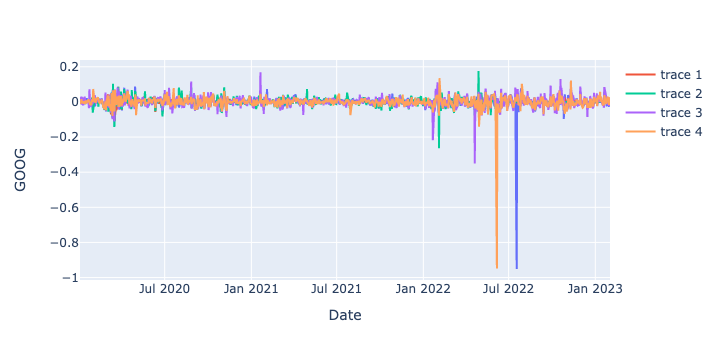

In [33]:
fig = px.line(tech_daily_returns, x="Date", y="GOOG")
# generate scatter plot
fig.add_scatter(x=tech_daily_returns['Date'], y=tech_daily_returns['SPY'])
fig.add_scatter(x=tech_daily_returns['Date'], y=tech_daily_returns['FB'])
fig.add_scatter(x=tech_daily_returns['Date'], y=tech_daily_returns['NFLX'])
fig.add_scatter(x=tech_daily_returns['Date'], y=tech_daily_returns['AMZN'])
fig.show()

In [34]:
tech_daily_returns.hvplot(kind='line', title='Tech Daily Returns hvplot')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [35]:
tech_cumulative_returns.hvplot(kind = "line", title="Tech Funds portfolios and the S&P 500 Cumulative Returns")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [36]:
tech_cumulative_returns = tech_cumulative_returns.reset_index()
tech_cumulative_returns = tech_cumulative_returns.rename(columns={"timestamp": "Date"})
tech_cumulative_returns.set_index("Date")

GOOG       SPY      AMZN      NFLX        FB
Date                                                                       
2020-01-03 05:00:00+00:00  0.995093  0.992489  0.987861  0.988145  0.994709
2020-01-06 05:00:00+00:00  1.019629  0.996491  1.002566  1.018253  1.013443
2020-01-07 05:00:00+00:00  1.018993  0.993444  1.004663  1.002850  1.015635
2020-01-08 05:00:00+00:00  1.027023  0.998615  0.996818  1.028653  1.025932
2020-01-09 05:00:00+00:00  1.038366  1.005294  1.001602  1.017737  1.040614
...                             ...       ...       ...       ...       ...
2023-01-26 05:00:00+00:00  0.072519  1.245883  0.052276  1.106304  0.937363
2023-01-27 05:00:00+00:00  0.073652  1.248746  0.053867  1.093872  0.937363
2023-01-30 05:00:00+00:00  0.071634  1.233078  0.052977  1.070647  0.937363
2023-01-31 05:00:00+00:00  0.073038  1.251208  0.054336  1.072921  0.937363
2023-02-01 05:00:00+00:00  0.074179  1.264506  0.055400  1.097571  0.937363

[776 rows x 5 columns]

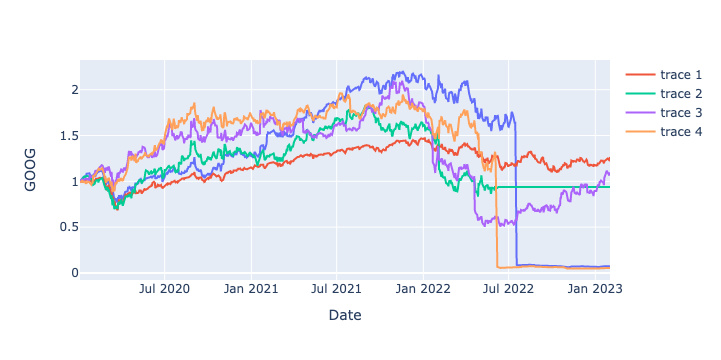

In [37]:
fig = px.line(tech_cumulative_returns, x="Date", y="GOOG")
# generate scatter plot
fig.add_scatter(x=tech_cumulative_returns['Date'], y=tech_cumulative_returns['SPY'])
fig.add_scatter(x=tech_cumulative_returns['Date'], y=tech_cumulative_returns['FB'])
fig.add_scatter(x=tech_cumulative_returns['Date'], y=tech_cumulative_returns['NFLX'])
fig.add_scatter(x=tech_cumulative_returns['Date'], y=tech_cumulative_returns['AMZN'])
fig.show()

#### Analyze Volatility 

In [38]:
tech_daily_returns.hvplot(kind='box', title = "Tech Stocks Volatility")


:BoxWhisker   [Variable]   (value)

In [39]:
drop_sp = tech_daily_returns.drop(columns=["SPY"]).copy()
tech_volatility = drop_sp.hvplot(kind='box', title='Volatility of The Four  stock Portfolios')
tech_volatility

:BoxWhisker   [Variable]   (value)

Based on this plot, it appears that the daily return data for AMZN is the most volatile. Although, its whisker seems to be the second shortest, the AMZN box plot has one number of outliers. This makes sense, because AMZN has the second greatest standard deviation, which is another measure of volatility. 

Additionally,  GOOG is in close contention for the most volatile. Although it has smaller whisker, it has an outlier way down at the bottom of the plot. This single data point is probably what won both Amazon and Goog the title as the most volatile of the four stocks in terms of the standard deviation. Netflix comes next followed by Facebook.


In [40]:
etf_daily_returns.hvplot(kind='box', title = "ETF Volatility")


:BoxWhisker   [Variable]   (value)

In [41]:
drop_sp = etf_daily_returns.drop(columns=["SPY"]).copy()
etf_volatility = drop_sp.hvplot(kind='box', title='Volatility of The two ETF Portfolios')
etf_volatility

:BoxWhisker   [Variable]   (value)

ETF Volatility:
VGT seems to be the most volatile by having longer whiskers with outliers. 

#### Analyze Risk

In [42]:
tech_standards_deviation = tech_daily_returns.std()
tech_standards_deviation.sort_values

<bound method Series.sort_values of Date    324 days 15:08:35.922526280
GOOG                       0.040443
SPY                        0.015323
AMZN                       0.042038
NFLX                        0.03255
FB                          0.02529
dtype: object>

By inspecting these four values excluding S&P as it is a benchmark, we can observe that Google (GOOG) and Amazon (AMZN) has the largest number, or standard deviation. This means that of the four stocks, the Google and Amazon individual returns deviate the most from its average return. That is, Amazon and Google are the most volatile stock and therefore the most risky compared to its peers. By contrast, Facebook (FB) has the smallest standard deviation, which indicates that it’s the least risky.

In [43]:
# The annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
tech_annualized_standards_deviation = tech_standards_deviation * np.sqrt(252)
tech_annualized_standards_deviation.sort_values

<bound method Series.sort_values of Date    5153 days 08:33:56.849493184
GOOG                        0.642015
SPY                         0.243252
AMZN                        0.667334
NFLX                        0.516721
FB                          0.401474
dtype: object>

In [44]:
etf_standards_deviation = etf_daily_returns.std()
etf_standards_deviation

Date    324 days 15:08:35.922526280
VOO                        0.015576
VGT                        0.019949
SPY                        0.015323
dtype: object

By inspecting these two values excluding S&P as it is a benchmark, we can observe that VGT has the highest number, or standard deviation. This means that of VGT individual returns deviate the most from its average return. That is, VGT is the most volatile ETF and therefore the most risky compared to its VOO. By contrast, VOO has the smallest standard deviation, which indicates that it’s the least risky.

In [45]:
# The annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
etf_annualized_standards_deviation = etf_standards_deviation * np.sqrt(252)
etf_annualized_standards_deviation

Date    5153 days 08:33:56.849493184
VOO                         0.247254
VGT                         0.316681
SPY                         0.243252
dtype: object

In [46]:
# The rolling standard deviation of the 4 portfolios and the S&P 500 plot
tech_annual_sd = tech_daily_returns.rolling(window=21).std().hvplot(kind="box",title="21-Day Rolling std of Tech Stock Portfolios and S&P 500")
etf_annual_sd = etf_daily_returns.rolling(window=21).std().hvplot(kind="box",title="21-Day Rolling std of ETF Portfolios and S&P 500")
tech_annual_sd + etf_annual_sd

:Layout
   .BoxWhisker.I  :BoxWhisker   [Variable]   (value)
   .BoxWhisker.II :BoxWhisker   [Variable]   (value)

In [47]:
tech_risk = drop_sp.rolling(window=21).std().hvplot(kind='box', title="21-Day Rolling Tech Stock Portfolios")

The tech stocks risk hasn't been increasing at the same time that the risk of the S&P 500. Amazon along with Google has the largest standard deviation and that is mainly because of outliers on summer 2022 making both of those stocks the most volatile implying they are the riskiest. Getting rid of these outliers is necessary if we want to take deeper look at their volatility and have an accurate comparison.

VGT funds risk hasn't been increasing as the S&P 500, making it the most volatile and riskiest. VOO has been increasing at the same time that the risk of S&P 500 making it the less riskiest. 

Based on the standard deviation, We would say Amazon and Google pose the most risk, however, this is only because of the one time outlier. Netflix seems to be the riskiest stock among these tech companies and the reason is it has less outliers but still its annualized standard deviation is 51% compared to 64% Google and 67% Amazon. Also, its whiskers is the longest among other tech stocks.



#### Analyze Risk-Return Profile 

In [48]:
# The annual average return data for the tech fund portfolios and the S&P 500
trading_days = 252
tech_annual_average_returns = tech_daily_returns.mean() * trading_days
tech_annual_average_returns.sort_values

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



<bound method Series.sort_values of GOOG   -0.113547
SPY     0.105957
AMZN   -0.205094
NFLX    0.170285
FB      0.061721
dtype: float64>

In [49]:
# The annual average return data for the ETF fund portfolios and the S&P 500
trading_days = 252
etf_annual_average_returns = etf_daily_returns.mean() * trading_days
etf_annual_average_returns.sort_values

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



<bound method Series.sort_values of VOO    0.107043
VGT    0.168560
SPY    0.105957
dtype: float64>

In [50]:
# The annualized Sharpe Ratios for each of the 4 tech stock portfolios and the S&P 500.
tech_annualized_sharpe_ratio = tech_annual_average_returns/ tech_annualized_standards_deviation
tech_annualized_sharpe_ratio.sort_values()

AMZN   -0.307333
GOOG    -0.17686
FB      0.153737
NFLX    0.329549
SPY     0.435587
Date         NaN
dtype: object

These values reveal that Amazon, with a Sharpe ratio of −0.655519, has the worst risk-return profile of the group. (A negative value indicates that we expect a negative return for the assumed risk.) By comparison, FB has the least worst risk-return profile among other tech stocks, with a Sharpe ratio of -0.157994. This means that none of the stocks offers a considerably better investment opportunity (from a risk-return perspective) than Amazon.

Note: if the outliers were removed from Google and Amazon, the results would have been different.

In [51]:
# The Sharpe ratios visualization as a bar chart
tech_annualized_sharpe_ratio.hvplot(kind="bar")

:Bars   [index]   (0)

The bar chart information doesn’t change our overall analysis. FB is still has the least worse  Sharpe ratio than other stocks. However, this bar chart validate our stock sharpe ratio analysis. Specifically, we can observe that Amazon offers a worse risk-return profile followed by Netflix.

In [52]:
etf_annualized_sharpe_ratio = etf_annual_average_returns/ etf_annualized_standards_deviation
etf_annualized_sharpe_ratio.sort_values()

VOO     0.432926
SPY     0.435587
VGT     0.532272
Date         NaN
dtype: object

These values reveal that VOO, with a Sharpe ratio of 0.685986, has the best risk-return profile of the group. VGT comes next with 0.559817. This is surprising as we already saw that VGT was outperforming both VOO and SPY in its daily as well as cumulative returns. However, it has a higher standard deviation than VOO which is the denominator in our sharpe ratio calculation. This means that VOO offers a considerably better investment opportunity (from a risk-return perspective) than VGT.

In [53]:
# the Sharpe ratios visualization as a bar chart
etf_annualized_sharpe_ratio.hvplot(kind="bar")

:Bars   [index]   (0)

This bar chart reveals some significant relationship among the ETF funds and S&P 500. Specifically, we can observe that The ETF funds have same Sharpe ratio as the S&P 500.

Tech stocks or ETF?

The ETF have all behaved very well over the period in question posting a excellent risk to return values. Based on both the Sharpe ratio I would have to suggest VOO as the primay investment for investors because it has the lowest standard deviation (at 0.247254) and therefore the lowest voltatility and the highest Sharpe ratio at 0.685986. VGT would be the second choice because, despite having the highest volatility (std 0.316681) in the ETF fund, it has the best risk/return profile with the second best Sharpe ratio of 0.559817 better than all stock sharpe ratios.  . 

#### Diversify Portfolio

To evaluate the risk relative to the broader market, we use different metrics: the variance, covariance, and beta. 

#### Variance
We use a volatility metric, called the variance, to help distinguish the riskier stocks from the more stable ones. The variance is the measurement of how far the numbers in a dataset spread around their mean. 

#### Covariance
We use the covariance to measure the directional relationship between two variables. The covariance allows us to examine how an asset’s risk moves in relation to another asset’s risk.

#### Beta
The beta measures how much an asset's return value is likely to change relative to changes in the overall market’s return value, as follows:

* A beta of 1.0 indicates that the asset's return value will likely be exactly the same as that of the market.

* A beta that’s greater than 1.0 indicates that the change in the asset's return value will likely be greater than the change in the market’s return value.

* A beta that’s less than 1.0 indicates that the change in the asset's return value will likely be less than that of the market.

To calculate the beta, we divide the covariance of an asset (that is, the asset’s relationship to the market) by the variance of the market,


A beta that’s less than 1.0 indicates that the change in the asset's return value will likely be less than that of the market.


1- Variance

In [54]:
tech_daily_returns.hvplot(title='Tech Daily Returns')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

This plot reveals that AMZN and Google are significantly more volatile than the S&P 500. Because the variance measures how far the data points spread around the mean, we expect AMZN and GOOG to have a greater variance than the S&P 500. We can confirm this by calculating each variance, as the following code shows:



In [55]:
tech_daily_returns.var()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



GOOG    0.001636
SPY     0.000235
AMZN    0.001767
NFLX    0.001060
FB      0.000640
dtype: float64

Indeed, Amazon is the most volatile based on variance caluculation followed by Google, Netflix then Facebook. 

In [56]:
# The variance of the S&P 500 using a rolling 60-day window.
variance_market = tech_daily_returns['SPY'].var()
variance_market

0.00023480831271636393

These results indicate that AMZN and GOOG have a greater variance value than the S&P 500, which confirms our initial expectation.

To illustrate how volatile the Amazon and Google stock during the later period, we could calculate the variance for Amazon, GOOG and the S&P 500 from June, 2022 to the end of the dataset. Going back to the plot of daily return information, we can observe that the specific time period seems volatile for both stocks. Therefore, we can expect that the variance values from this period exceed those that we initially calculated.

In [57]:
amzn_daily_returns_2022_2023 = tech_daily_returns['AMZN'].loc['2022-06-01':]
goog_daily_returns_2022_2023 = tech_daily_returns['GOOG'].loc['2022-06-01':]
spy_daily_returns_2022_2023 = tech_daily_returns['SPY'].loc['2022-06-01':]

print(amzn_daily_returns_2022_2023.var())
print(goog_daily_returns_2022_2023.var())
print(spy_daily_returns_2022_2023.var())



0.0021637258474737184
0.0019847814524863766
0.0001453169484547085


We notice that the variance of AMZN and GOOG exceeds that of the first calculation (0.002163 vs. 0.001767) and (0.001984 vs 0.001636). This indicates that AMZN and GOOG wwere more volatile in this later time period than it was over the entire period of the dataset. Notice that the same thing applies to the variance of the S&P 500 (0.000145 vs. 0.000235).

To compare the magnitude of the change between the two assets, we take the difference in the variance between AMZN, GOOG and the S&P 500:
For the whole period,  it was 0.001532 (0.001767- 0.000235) for Amazon and 0.001401 (0.001636-0.000235) for GOOG. Over the shorter period, it was 0.002018 (0.002163-0.000145) for AMZN and 0.001839 (0.001984 - 0.000145) for GOOG.

This indicates that AMZN was most volatile than the market during the 2022–2023 time period than it was over the whole period.

In [58]:
etf_daily_returns.hvplot(title='ETF Daily Returns')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [59]:
etf_daily_returns.var()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



VOO    0.000243
VGT    0.000398
SPY    0.000235
dtype: float64

In [60]:
variance_market = etf_daily_returns['SPY'].var()
variance_market

0.00023480831271636393

These results indicate that VGT has a greater variance value than the S&P 500, which confirms our initial expectation from the daily returns analysis.  

The variance measures the price volatility of a single asset around its mean over time. 

To recap, considering how volatile tech stocks are compared to the S&P, ETFs seem to be the best investment opportunity for investors at the moment. All of the tech stocks have higher variance than the S&P 500.  We recommend that investors go for ETFs as they have a mix of variance levels. They don't all have a high or a low variance compared to stocks.

In our analysis, AMZN and GOOG have a higher variance than the S&P 500. We recommend invetsors to invest in VOO that has a higher a higher variance that’s more in line with the S&P 500. Alternatively, we might recommend investing in an asset with a high variance that tends to move in the opposite direction than that of AMZN or GOOG. That is, the variance of this asset decreases when the AMZN variance increases and vice versa.

For this reason, we will run covariance analysis to measures how tech stocks assets behave in relation to each other and how tech stocks behave relative to ETFs. 



2- Covariance

We can use the covariance to determine how a stock and ETFs trade relative to the broader market. A well-constructed, diversified portfolio contains some stocks with a positive market covariance and some with a negative market covariance. We can then have solid investment performance while managing the risk profile of the portfolio.

In [61]:
# Tech covariance 
amzn_covariance = tech_daily_returns['AMZN'].cov(tech_daily_returns['SPY'])
print(amzn_covariance)
fB_covariance = tech_daily_returns['FB'].cov(tech_daily_returns['SPY'])
print(fB_covariance)
nflx_covariance = tech_daily_returns['NFLX'].cov(tech_daily_returns['SPY'])
print(nflx_covariance)
goog_covariance = tech_daily_returns['GOOG'].cov(tech_daily_returns['SPY'])
print(goog_covariance)

0.00024301635352208675
0.00023032232109860206
0.00024163681849583035
0.0002764521415362639


In [62]:
#etf Covariance
vgt_covariance = etf_daily_returns['VGT'].cov(etf_daily_returns['SPY'])
print(vgt_covariance)
# The covariance using a 60-day rolling window 
voo_covariance = etf_daily_returns['VOO'].cov(etf_daily_returns['SPY'])
print(voo_covariance)

0.0002847690390716073
0.00023650667843965286


All tech stocks covariances with the S&P 500 are positive. This indicates that the tech stock price tends to move in the same direction as that of the S&P 500. This makes sense, because S&P 500 hold AMZN which is one of the five largest stocks in the S&P 500.

As for ETFs, their covariances with the S&P 500 are positive.This also indicates that the ETF price tends to move in the same direction as that of the S&P 500.

3- Beta: we divide the covariance of an asset (that is, the asset’s relationship to the market) by the variance of the market

In [63]:
# Tech beta based on the 60-day rolling covariance compared to the market (S&P 500)
fb_beta = (fB_covariance/variance_market) 
print(f"FB: {fb_beta}")
amzn_beta = (amzn_covariance/variance_market) 
print(f"AMZN: {amzn_beta}")
nflx_beta = (nflx_covariance/variance_market) 
print(f"NFLX: {nflx_beta}")
goog_beta = (goog_covariance/variance_market) 
print(f"GOOG: {goog_beta}")

FB: 0.9808950902722907
AMZN: 1.0349563467782237
NFLX: 1.0290811926565602
GOOG: 1.1773524469306311


Because all the tech stocks beta calculation is greater than 1,  we expect the return on tech stocks to be more volatile than that of the market meaning that if the market went up (or down) by 1%, the tech stocks prices would also go up (or down) by 1%. However, that’s not always the case as the stock might return even more than the market or less than the market.Overall, We could say there is greater variability in a tech stock's expected move relative to the market.

In [69]:
# ETF beta based on the 60-day rolling covariance compared to the market (S&P 500)
voo_beta = (voo_covariance/variance_market) 
print(f"VOO: {voo_beta}")
vgt_beta = (vgt_covariance/variance_market) 
print(f"VGT: {vgt_beta}")

VOO: 1.0072329880643556
VGT: 1.2127723919876436


ETF provide a diversified portfolio including assets with with a high beta (vs. the benchmark) and some with a beta close to 1.0. We could see that VOO has a beta of 1 indicating that the VOO return value will likely be exactly the same as that of the market. VGT on the other hand has beta higher than 1 indicating that the return on VGT to be more volatile than that of the market.

In [72]:
sp_variance = tech_daily_returns["SPY"].rolling(window=60).var()
sp_variance.tail()

771    0.000188
772    0.000187
773    0.000190
774    0.000181
775    0.000180
Name: SPY, dtype: float64

In [75]:
tech_covariance= tech_daily_returns['AMZN'].rolling(window=60).cov(tech_daily_returns["SPY"])
tech_covariance.tail()


771    0.000338
772    0.000338
773    0.000337
774    0.000320
775    0.000316
dtype: float64

In [78]:
tech_beta = (tech_covariance/sp_variance) 
tech_beta.tail()

771    1.797273
772    1.804638
773    1.774698
774    1.766252
775    1.753365
dtype: float64

In [79]:
tech_beta.hvplot(title="60-Day Rolling Beta: Amazon")

:Curve   [index]   (0)

In [80]:
sp_variance = etf_daily_returns["SPY"].rolling(window=60).var()
sp_variance.tail()

771    0.000188
772    0.000187
773    0.000190
774    0.000181
775    0.000180
Name: SPY, dtype: float64

In [83]:
etf_covariance= etf_daily_returns['VGT'].rolling(window=60).cov(etf_daily_returns["SPY"])
etf_covariance.tail()

771    0.000273
772    0.000272
773    0.000276
774    0.000262
775    0.000259
dtype: float64

In [84]:
etf_beta = (etf_covariance/sp_variance) 
etf_beta.tail()

771    1.452880
772    1.452079
773    1.452988
774    1.444209
775    1.436675
dtype: float64

In [86]:
etf_beta.hvplot(title="60-Day Rolling Beta: VGT")

:Curve   [index]   (0)